In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
#only gets data anlayst jobs and US country
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop Nan values from yearly_avg_salary
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

269416    125000.0
505963    150000.0
17101     142500.0
207874     80000.0
18660     240000.0
24148      65000.0
625320    150000.0
47457     118222.0
68234     126452.0
757779     56745.0
Name: salary_year_avg, dtype: float64

<Axes: >

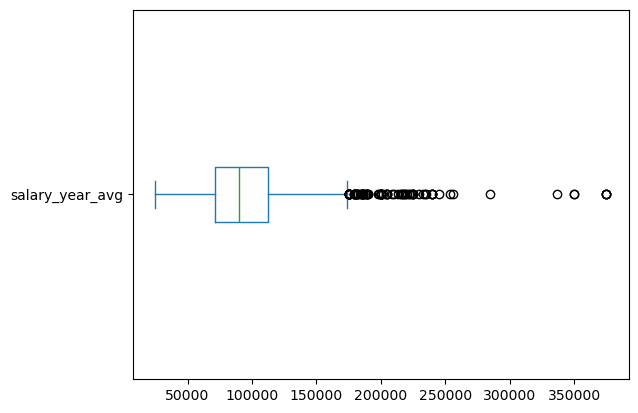

In [9]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

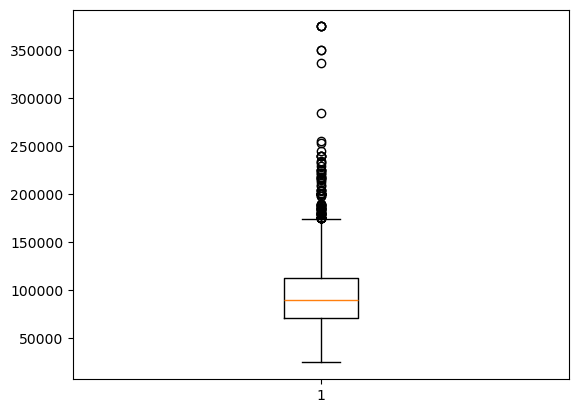

In [10]:
plt.boxplot(df_DA_US['salary_year_avg'])
plt.show()

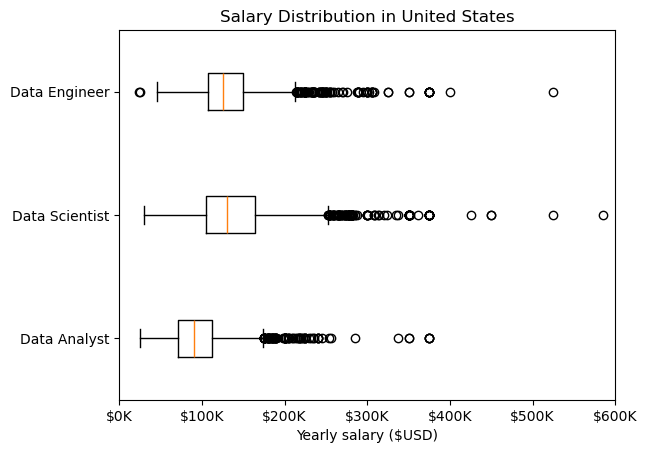

In [19]:
job_titles = ['Data Analyst','Data Scientist','Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset='salary_year_avg')

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in United States')
plt.xlabel('Yearly salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [14]:
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64